In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Load data
df = pd.read_csv('data.csv')

# Randomly sample 10% of the data
df = df.sample(frac=0.1, random_state=42)

# Separate target variable and features
y = df['isFraud']
X = df.drop(['isFraud'], axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict_proba(X_test)[:,1]
lr_score = roc_auc_score(y_test, lr_preds)

# Fit a random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict_proba(X_test)[:,1]
rf_score = roc_auc_score(y_test, rf_preds)

# Perform feature selection with the random forest model
selector = SelectFromModel(rf, prefit=True, threshold='mean')
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Fit logistic regression with selected features
lr_selected = LogisticRegression(random_state=42, max_iter=1000)
lr_selected.fit(X_train_selected, y_train)
lr_preds_selected = lr_selected.predict_proba(X_test_selected)[:,1]
lr_score_selected = roc_auc_score(y_test, lr_preds_selected)

print("Logistic Regression AUC:", lr_score)
print("Random Forest AUC:", rf_score)
print("Logistic Regression with Selected Features AUC:", lr_score_selected)
print("Selected Features:", X.columns[selector.get_support()].tolist())


Logistic Regression AUC: 0.628275440482632
Random Forest AUC: 0.5924512414695821
Logistic Regression with Selected Features AUC: 0.5080305796146602
Selected Features: ['month', 'flag_2', 'flag_5', 'flag_10', 'flag_18', 'flag_19']


/Users/chrisjackson/miniforge3/envs/mini_env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/chrisjackson/miniforge3/envs/mini_env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


AttributeError: module 'matplotlib.pyplot' has no attribute 'get_xticklabels'

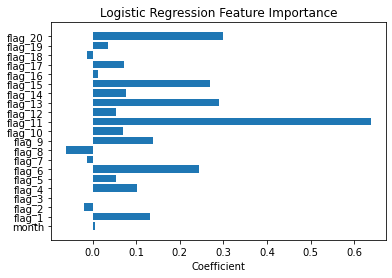

In [12]:
import matplotlib.pyplot as plt

# Get the feature names and coefficients from the logistic regression model
feature_names = X_train.columns
coefficients = lr.coef_[0]

# Get top 6 features
top_6 = coefficients[:6]

# Create a horizontal bar chart to show the feature importance
plt.barh(feature_names, coefficients)
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Coefficient')
for i in top_6:
    plt.get_xticklabels()[i].set_color("red")
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'get_xticklabels'

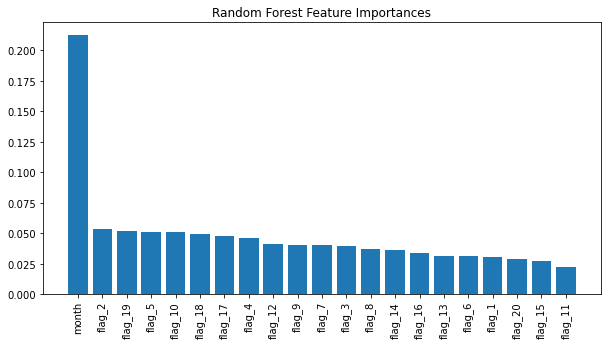

In [14]:
# Get feature importances from random forest model
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get top 6 features
top_6 = indices[:6]

# Plot feature importances with top 6 highlighted
plt.figure(figsize=(10,5))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
for i in top_6:
    plt.get_xticklabels()[i].set_color("red")
plt.tight_layout()
plt.show()


